### Generate random initialised sequence from which synthetic data will be generated

In [2]:
!pip install gluonts
!pip install gluonts.trainer

ERROR: Could not find a version that satisfies the requirement gluonts.trainer (from versions: none)
ERROR: No matching distribution found for gluonts.trainer


In [3]:
from gluonts.dataset.artificial import recipe as rcp
recipe = dict(
    myOutput1=rcp.RandomGaussian()
)
def print_dicts(*dicts):
    for d in dicts:
        print("{")
        for k,v in d.items():
            print("\t", k, ": ", v)
        print("}\n")

# multiple evaluations lead to different results, due to randomness
print_dicts(rcp.evaluate(recipe, length=100))

{
	 myOutput1 :  [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.165149

### Training the deepAR model

In [4]:
import pandas as pd
import numpy as np 

from time_series.dataset.time_series import TrainingDataSet
from time_series.utils import evaluate_model

from tensorflow.python.framework.ops import disable_eager_execution
import tensorflow as tf
disable_eager_execution()  
tf.compat.v1.experimental.output_all_intermediates(True)

from time_series.models.deepar import DeepAR

np.random.seed(0)
url = 'wiki.csv'
data_df = pd.read_csv(url, header=0,index_col =0)
data_df.shape

(1827, 1)

In [5]:
#Printing details of the dataset
print("Columns: {}".format(data_df.columns))
print("Number of Columns: {}".format(len(data_df.columns)))

data_df.index = pd.to_datetime(data_df.index)
print("Indexcolumn: {}".format(data_df.index))
data_df.head()

Columns: Index(['value'], dtype='object')
Number of Columns: 1
Indexcolumn: DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='date', length=1827, freq=None)


,value
date,
2015-07-01,162754846
2015-07-02,161763738
2015-07-03,152125660
2015-07-04,153035028
2015-07-05,164069312


In [10]:
tds = TrainingDataSet(data_df,lag =10)
print("X train shape: {}".format(tds.X_train.shape ))
print("y train shape: {}".format(tds.y_train.shape ))
print("X test shape: {}".format(tds.X_test.shape ))
tds.y_train[0] #10 x 1 2D array

X train shape: (1461, 10, 1)
y train shape: (1461, 10, 1)
X test shape: (356, 10, 1)


array([[1.74825592e+08],
       [1.66658334e+08],
       [1.52243729e+08],
       [1.57919395e+08],
       [1.66547485e+08],
       [1.68053840e+08],
       [1.76030520e+08],
       [1.77984259e+08],
       [1.74969377e+08],
       [1.57631791e+08]])

In [11]:
ar_model = DeepAR(tds)
ar_model.instantiate_and_fit(verbose=1, epochs=100)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 16)            1152      
                                                                 
 dense_1 (Dense)             (None, 10, 4)             68        
                                                                 
 main_output (GaussianLayer)  [(None, 10, 1),          10        
                              (None, 10, 1)]                     
                                                                 
Total params: 1,230
Trainable params: 1,230
Non-trainable params: 0
_________________________________________________________________
Train on 1461 samples
Epoch 1/100
1461/1461 [==============================] - 0s 307us/sample - loss: 78968272477211680.00

1461/1461 [==============================] - 0s 94us/sample - loss: 541060653194383.6875 - mean_absolute_percentage_error: 100.0000 - mae: 179290880.0000 - mse: 32303552839811072.0000
Epoch 38/100
1461/1461 [==============================] - 0s 88us/sample - loss: 521317652656164.4375 - mean_absolute_percentage_error: 100.0000 - mae: 179290848.0000 - mse: 32303557134778368.0000
Epoch 39/100
1461/1461 [==============================] - 0s 89us/sample - loss: 498798183843945.1250 - mean_absolute_percentage_error: 100.0000 - mae: 179290832.0000 - mse: 32303546397360128.0000
Epoch 40/100
1461/1461 [==============================] - 0s 92us/sample - loss: 483364572347126.3750 - mean_absolute_percentage_error: 100.0000 - mae: 179290848.0000 - mse: 32303550692327424.0000
Epoch 41/100
1461/1461 [==============================] - 0s 92us/sample - loss: 470924876358658.1250 - mean_absolute_percentage_error: 100.0000 - mae: 179290848.0000 - mse: 32303550692327424.0000
Epoch 42/100
1461/1461 [====

1461/1461 [==============================] - 0s 92us/sample - loss: 186185720679077.0625 - mean_absolute_percentage_error: 100.0000 - mae: 179290848.0000 - mse: 32303544249876480.0000
Epoch 79/100
1461/1461 [==============================] - 0s 88us/sample - loss: 182065162935854.5938 - mean_absolute_percentage_error: 100.0000 - mae: 179290848.0000 - mse: 32303544249876480.0000
Epoch 80/100
1461/1461 [==============================] - 0s 89us/sample - loss: 178438530094869.9062 - mean_absolute_percentage_error: 100.0000 - mae: 179290816.0000 - mse: 32303546397360128.0000
Epoch 81/100
1461/1461 [==============================] - 0s 102us/sample - loss: 173698776697206.2812 - mean_absolute_percentage_error: 100.0000 - mae: 179290832.0000 - mse: 32303539954909184.0000
Epoch 82/100
1461/1461 [==============================] - 0s 95us/sample - loss: 170994799489295.9375 - mean_absolute_percentage_error: 100.0000 - mae: 179290848.0000 - mse: 32303546397360128.0000
Epoch 83/100
1461/1461 [===

C:\Users\Resh\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[1.79619309e+08]
 [1.76484765e+08]
 [1.75912081e+08]
 [1.77531496e+08]
 [1.78506360e+08]
 [1.85716094e+08]
 [1.91783947e+08]
 [1.76551351e+08]
 [1.74760369e+08]
 [1.78544726e+08]]
MSE: 37012772774717384.0000
----------
---dimensions1
value: 3.3721295463309144e+16


array([[12.354861],
       [13.18437 ],
       [13.31151 ],
       [13.329026],
       [13.331402],
       [13.331725],
       [13.331768],
       [13.331774],
       [13.331774],
       [13.331774]], dtype=float32)

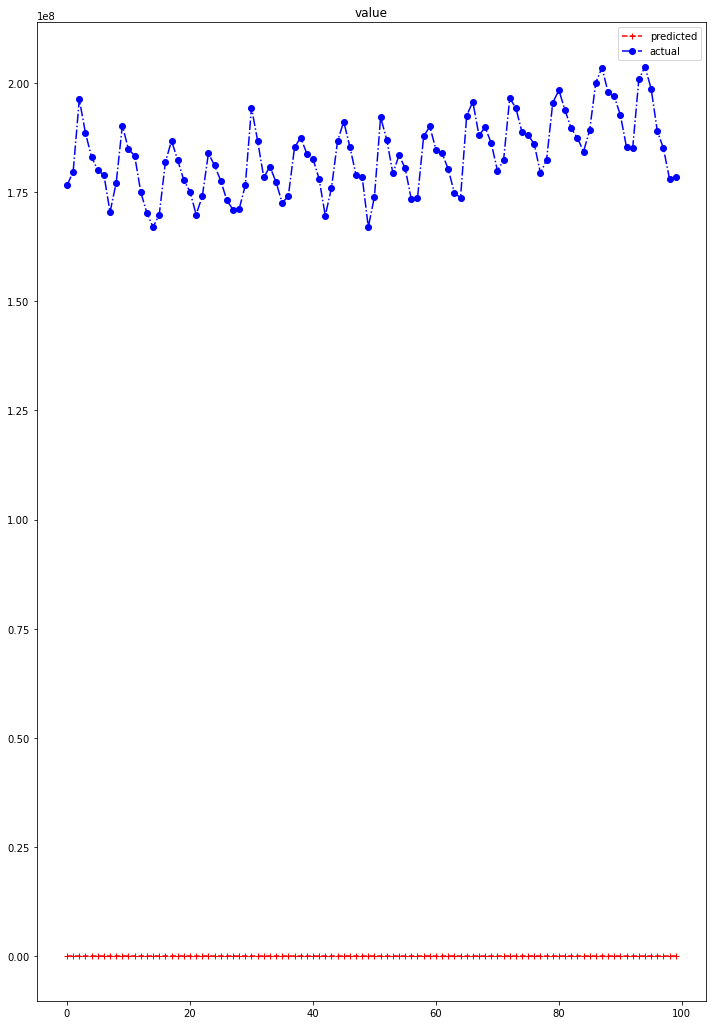

In [12]:
 y_predicted = ar_model.model.predict(tds.X_test)
print(tds.y_test[0])
evaluate_model(tds=tds, y_predicted=y_predicted, columns=data_df.columns, first_n=100)
y_predicted[0]